In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
# regression evalution metrics
#   https://developer.nvidia.com/blog/a-comprehensive-overview-of-regression-evaluation-metrics/
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score

In [9]:
### INPUTS ###
target_variable = 't+1 GDP per capita (current US$)'

In [2]:
df = pd.read_csv('output files/inter_df.csv')
# make a new column called 't+1 GDP per capita (current US$)' that is the GDP per capita for the next year
df[target_variable] = df['GDP per capita (current US$)'].shift(-1) # doesn't consider 'country' so will be next countries GDP per capita when year==2022
# drop all rows where 'year'==2022
df = df[df['year'] != 2022]
df.head()

,country,year,Rural land area where elevation is below 5 meters (sq. km),Population living in areas where elevation is below 5 meters (% of total population),Urban land area where elevation is below 5 meters (% of total land area),Urban land area where elevation is below 5 meters (sq. km),Rural population living in areas where elevation is below 5 meters (% of total population),Rural land area where elevation is below 5 meters (% of total land area),Rural land area (sq. km),Urban population living in areas where elevation is below 5 meters (% of total population),...,"Population ages 20-24, female (% of female population)","Population ages 20-24, male (% of male population)","Population ages 25-29, female (% of female population)","Population ages 25-29, male (% of male population)","Population ages 30-34, female (% of female population)","Population ages 30-34, male (% of male population)","Population ages 35-39, female (% of female population)","Population ages 15-64, female",Population density (people per sq. km of land area),t+1 GDP per capita (current US$)
0,Argentina,1990,16920.045279,0.718817,0.005206,142.991808,0.135622,0.615986,2.738252e+06,0.583195,...,7.450311,7.824520,7.043225,7.382736,6.751360,7.014554,6.399840,10018784,11.925961,5730.723810
1,Argentina,1991,16913.500264,0.735585,0.005444,149.536824,0.133468,0.615748,2.738106e+06,0.602117,...,7.488139,7.847989,7.013666,7.351642,6.690104,6.955990,6.382796,10165241,12.097009,6815.331623
2,Argentina,1992,16906.955248,0.752354,0.005682,156.081840,0.131315,0.615510,2.737960e+06,0.621039,...,7.556116,7.904035,6.975985,7.309718,6.630142,6.899480,6.367334,10312629,12.266017,6957.417499
3,Argentina,1993,16900.410232,0.769122,0.005921,162.626856,0.129161,0.615271,2.737814e+06,0.639961,...,7.654794,8.001791,6.934663,7.261322,6.587634,6.860561,6.342717,10462171,12.433721,7464.474737
4,Argentina,1994,16893.865216,0.785890,0.006159,169.171872,0.127007,0.615033,2.737668e+06,0.658883,...,7.778153,8.132933,6.909632,7.225702,6.559106,6.833047,6.302276,10613978,12.602339,7383.704510


##### Variable to predict
- choosing 'GDP per capita (current US$)' but might try 'GDP per capita, PPP (current international $)'
    - the target variable will be x_t+1
- need to remove all variable that are overly similar to my target variable

##### Testing Correlation to Target Variable
- helpful links:
    - https://stats.stackexchange.com/questions/8071/how-to-choose-between-pearson-and-spearman-correlation/14963#14963
    - https://www.phdata.io/blog/data-science-stats-review/

In [4]:
# test the correlation of 't+1 GDP per capita (current US$)' and all other columns except 'Country Name' and 'Year'
# create a new dataframe called 'corr_df' that contains the correlation values using the methods 'pearson', 'kendall', and 'spearman'
corr_df = pd.DataFrame()
target_feature = target_variable

corr_df['pearson'] = df.iloc[:,2:].corr(method='pearson')[target_feature]
corr_df['kendall'] = df.iloc[:,2:].corr(method='kendall')[target_feature]
corr_df['spearman'] = df.iloc[:,2:].corr(method='spearman')[target_feature]
corr_df['var_pk'] = corr_df['pearson'] - corr_df['kendall']
corr_df['var_sk'] = corr_df['spearman'] - corr_df['kendall']
corr_df['var_ps'] = corr_df['pearson'] - corr_df['spearman']

corr_df.to_csv('output files/corrDf.csv', index=True)

corr_df.sort_values(by=['kendall'], ascending=False, inplace=True)

In [5]:
corr_df

,pearson,kendall,spearman,var_pk,var_sk,var_ps
t+1 GDP per capita (current US$),1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
GDP per capita (current US$),0.973737,0.893339,0.980013,0.080398,0.086674,-0.006276
Adjusted net national income per capita (current US$),0.955733,0.863153,0.968803,0.092580,0.105650,-0.013070
"GNI per capita, Atlas method (current US$)",0.960825,0.859251,0.969060,0.101574,0.109808,-0.008235
"GNI per capita, PPP (current international $)",0.904975,0.753031,0.920898,0.151944,0.167868,-0.015924
...,...,...,...,...,...,...
Population ages 0-14 (% of total population),-0.780124,-0.667265,-0.859374,-0.112859,-0.192109,0.079250
"Population ages 0-14, female (% of female population)",-0.782667,-0.671047,-0.861558,-0.111620,-0.190511,0.078891
"Birth rate, crude (per 1,000 people)",-0.756334,-0.672461,-0.858538,-0.083873,-0.186077,0.102204
"Population ages 00-04, male (% of male population)",-0.761705,-0.673685,-0.861259,-0.088019,-0.187574,0.099554


In [6]:
### WILL TRY MODEL WITH AND W/O LOW CORRELATION FEATURES
# columns with low correlation but want to keep since I think they are important 
keep_features = [
    'Death rate, crude (per 1,000 people)',
    'Labor force participation rate, female (% of female population ages 15+) (modeled ILO estimate)',
    'Labor force participation rate, total (% of total population ages 15-64) (modeled ILO estimate)',
    'Employment to population ratio, 15+, female (%) (modeled ILO estimate)',
    'Population ages 30-34, female (% of female population)',
    'Primary education, duration (years)',
    'Arable land (hectares per person)'
                 ]

corr_df[(corr_df['kendall'] < 0.05) & (corr_df['kendall'] > -0.05) & (~corr_df.index.isin(keep_features))]

,pearson,kendall,spearman,var_pk,var_sk,var_ps
Population living in areas where elevation is below 5 meters (% of total population),-0.174980,0.048552,0.075603,-0.223532,0.027052,-0.250584
Net secondary income (Net current transfers from abroad) (current LCU),0.001562,0.047160,0.073448,-0.045598,0.026288,-0.071886
"Services, value added (annual % growth)",0.024314,0.046601,0.057664,-0.022287,0.011063,-0.033350
"Share of tariff lines with international peaks, manufactured products (%)",0.019462,0.045291,0.061702,-0.025829,0.016411,-0.042240
Rural land area where elevation is below 5 meters (% of total land area),-0.085209,0.044684,0.082133,-0.129894,0.037449,-0.167342
"Other greenhouse gas emissions, HFC, PFC and SF6 (thousand metric tons of CO2 equivalent)",0.065480,0.044411,0.074896,0.021070,0.030485,-0.009416
"Industry (including construction), value added (% of GDP)",0.010193,0.037372,0.053572,-0.027179,0.016200,-0.043379
"Regulatory Quality: Percentile Rank, Upper Bound of 90% Confidence Interval",0.000665,0.037040,0.071534,-0.036376,0.034493,-0.070869
"Binding coverage, all products (%)",0.098551,0.035092,0.040693,0.063459,0.005601,0.057858
"Share of tariff lines with international peaks, all products (%)",-0.005305,0.030831,0.043361,-0.036136,0.012530,-0.048666


In [7]:
exclude_features = corr_df[(corr_df['kendall'] < 0.05) & (corr_df['kendall'] > -0.05) & (~corr_df.index.isin(keep_features))].index.tolist()
exclude_features

['Population living in areas where elevation is below 5 meters (% of total population)',
 'Net secondary income (Net current transfers from abroad) (current LCU)',
 'Services, value added (annual % growth)',
 'Share of tariff lines with international peaks, manufactured products (%)',
 'Rural land area where elevation is below 5 meters (% of total land area)',
 'Other greenhouse gas emissions, HFC, PFC and SF6 (thousand metric tons of CO2 equivalent)',
 'Industry (including construction), value added (% of GDP)',
 'Regulatory Quality: Percentile Rank, Upper Bound of 90% Confidence Interval',
 'Binding coverage, all products (%)',
 'Share of tariff lines with international peaks, all products (%)',
 'Net bilateral aid flows from DAC donors, Korea, Rep. (current US$)',
 'Renewable internal freshwater resources, total (billion cubic meters)',
 'Official exchange rate (LCU per US$, period average)',
 'Net bilateral aid flows from DAC donors, Germany (current US$)',
 'Fuel exports (% of mer

In [11]:
# use sklearns's 'DecisionTreeRegressor' to predict 't+1 GDP per capita (current US$)'
from sklearn.tree import DecisionTreeRegressor

test_df = df.copy()

# remove 'exclude_features' from test_df
test_df.drop(columns=exclude_features, inplace=True)
# convert 'coutry' to a numeric value to represent each country
test_df['country'] = pd.factorize(test_df['country'])[0]


# split the data into training and validation data
train_y = test_df[target_variable]
train_X = test_df.drop(columns=[target_variable])
train_X, val_X, train_y, val_y = train_test_split(train_X, train_y, random_state=53)

# define and fit model
model = DecisionTreeRegressor(random_state=1)
model.fit(train_X, train_y)

# get predicted prices on validation data
val_predictions = model.predict(val_X)

print(mean_absolute_error(val_y, val_predictions))

831.6872987749912


In [12]:
from sklearn import linear_model

test_df = df.copy()
# remove 'exclude_features' from test_df
test_df.drop(columns=exclude_features, inplace=True)
# convert 'coutry' to a numeric value to represent each country
test_df['country'] = pd.factorize(test_df['country'])[0]

# split the data into training and validation data
train_y = test_df[target_variable]
train_X = test_df.drop(columns=[target_variable])
train_X, val_X, train_y, val_y = train_test_split(train_X, train_y, random_state=53, test_size=0.2)

reg = linear_model.Lasso(alpha=0.2, max_iter=100000, tol=0.01)
reg.fit(train_X, train_y)

print(mean_absolute_error(val_y, reg.predict(val_X)))
print(mean_absolute_percentage_error(val_y, reg.predict(val_X)))
print(r2_score(val_y, reg.predict(val_X)))
print(np.sum(val_y - reg.predict(val_X)) / val_y.size) # mean bias error

# these features have zero coefficient as a result of L1 (lasso) regularization
zero_features = np.array(train_X.columns)[reg.coef_ == 0]
weighted_features = np.array(train_X.columns)[reg.coef_ != 0]

print(len(zero_features))
print(len(weighted_features))

678.1917400169878
0.20473482707882118
0.9512576743954088
-181.12481977784242
7
396


In [13]:
reg = linear_model.LassoLars(alpha=0.2, normalize=False, random_state=53)

reg.fit(train_X, train_y)
print(mean_absolute_error(val_y, reg.predict(val_X)))
print(mean_absolute_percentage_error(val_y, reg.predict(val_X)))
print(r2_score(val_y, reg.predict(val_X)))
print(np.sum(val_y - reg.predict(val_X)) / val_y.size) # mean bias error

# these features have zero coefficient as a result of L1 (lasso) regularization
zero_features = np.array(train_X.columns)[reg.coef_ == 0]
weighted_features = np.array(train_X.columns)[reg.coef_ != 0]

print(len(zero_features))
print(len(weighted_features))

1356.6759600504479
0.4592333614714123
0.7956664551142137
-273.743345466822
332
71


c:\Users\Gavin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_least_angle.py:679: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 184 iterations, alpha=1.630e+07, previous alpha=1.515e+07, with an active set of 71 regressors.
  warnings.warn(


c:\Users\Gavin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.050e+07, tolerance: 1.721e+06
  model = cd_fast.enet_coordinate_descent(
c:\Users\Gavin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.425e+07, tolerance: 1.721e+06
  model = cd_fast.enet_coordinate_descent(
c:\Users\Gavin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

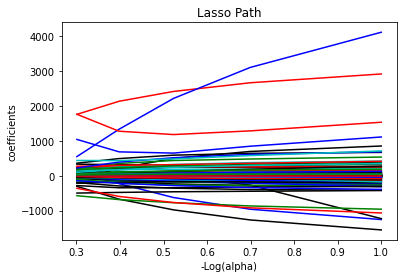

In [14]:
# can limit the features and toy around with this to see how coefficients evolve from regularization

from matplotlib import pyplot as plt
from itertools import cycle

reg = linear_model.lasso_path(train_X, train_y, alphas=[0.1, 0.2, 0.3, 0.4, 0.5])

# Display results
m_log_alphas = -np.log10(reg[0])
plt.figure()
colors = cycle(['b', 'r', 'g', 'c', 'k'])
neg_log_alphas = -np.log10(reg[0])
for coef_l, c in zip(reg[1], colors):
    l1 = plt.plot(neg_log_alphas, coef_l, c=c)

plt.xlabel('-Log(alpha)')
plt.ylabel('coefficients')
plt.title('Lasso Path')
plt.axis('tight')
plt.show()